Notebook to test some basic functionalities

In [ ]:
import matplotlib.pyplot as plt
from connections import Connections
from connectome_reader import ConnectomeReader
from neuron import Neuron

Perform synaptic based representation.
Allows to test the data loading and preprocessing fro the Neuron class and the Connections class.

In [2]:
"""
# Data loading testing
MDNs = []
neurons_pre = get_neuron_bodyids({'type:string': 'MDN'})

"""

In [ ]:
"""

# Neuron class testing
for i in range(4):
    MDN = Neuron(neurons_pre[i])
    _ = MDN.get_synapse_distribution(threshold=True)
    #MDN.cluster_synapses_spatially(n_clusters=3)
    #MDN.create_synapse_groups(attribute='KMeans_cluster')
    MDN.create_synapse_groups(attribute='neuropil')
    _ = MDN.plot_synapse_distribution(
        color_by='neuropil',
        discrete_coloring=True,
        threshold=True,
        cmap="Spectral")
    MDNs.append(MDN)
"""

In [1]:
from connections import Connections

#VNC = Connections(split_neurons=MDNs)  # full VNC
VNC = Connections()  # full VNC

Attribute class_1 not found in the graph. Adding it.


In [2]:
df = VNC.get_dataframe()
df.head()

,start_bid,syn_count,end_bid,nt_type,eff_weight,subdivision_start,subdivision_end,syn_count_norm,eff_weight_norm,start_uid,end_uid
0,10000,136,14882,acetylcholine,136,0,0,0.049908,0.049908,7517,3144
1,10000,36,11047,acetylcholine,36,0,0,0.006809,0.006809,7517,4138
2,10000,9,17889,acetylcholine,9,0,0,0.006303,0.006303,7517,18947
3,10000,21,22805,acetylcholine,21,0,0,0.015119,0.015119,7517,8989
4,10000,9,24198,acetylcholine,9,0,0,0.037975,0.037975,7517,13225


In [3]:
g = VNC.get_graph(syn_threshold = 800)
print(g.nodes.data())

[(389, {'body_id': 11057, 'node_label': 'IN19B003', 'class_1': 'intrinsic', 'node_class': 'intrinsic'}), (2875, {'body_id': 100544, 'node_label': 'IN15A001', 'class_1': 'intrinsic', 'node_class': 'intrinsic'}), (16496, {'body_id': 10664, 'node_label': 'IN13B002', 'class_1': 'intrinsic', 'node_class': 'intrinsic'}), (7885, {'body_id': 13006, 'node_label': 'MNhl39', 'class_1': 'motor', 'node_class': 'motor'}), (14911, {'body_id': 10461, 'node_label': 'MNml41', 'class_1': 'motor', 'node_class': 'motor'}), (6276, {'body_id': 10146, 'node_label': 'IN19A001', 'class_1': 'intrinsic', 'node_class': 'intrinsic'}), (18407, {'body_id': 10670, 'node_label': 'IN19A001', 'class_1': 'intrinsic', 'node_class': 'intrinsic'}), (2594, {'body_id': 11218, 'node_label': None, 'class_1': 'intrinsic', 'node_class': 'intrinsic'}), (16377, {'body_id': 10462, 'node_label': 'MNhl41', 'class_1': 'motor', 'node_class': 'motor'}), (8194, {'body_id': 10256, 'node_label': 'IN19A001', 'class_1': 'intrinsic', 'node_clas

<Axes: title={'center': 'test'}>

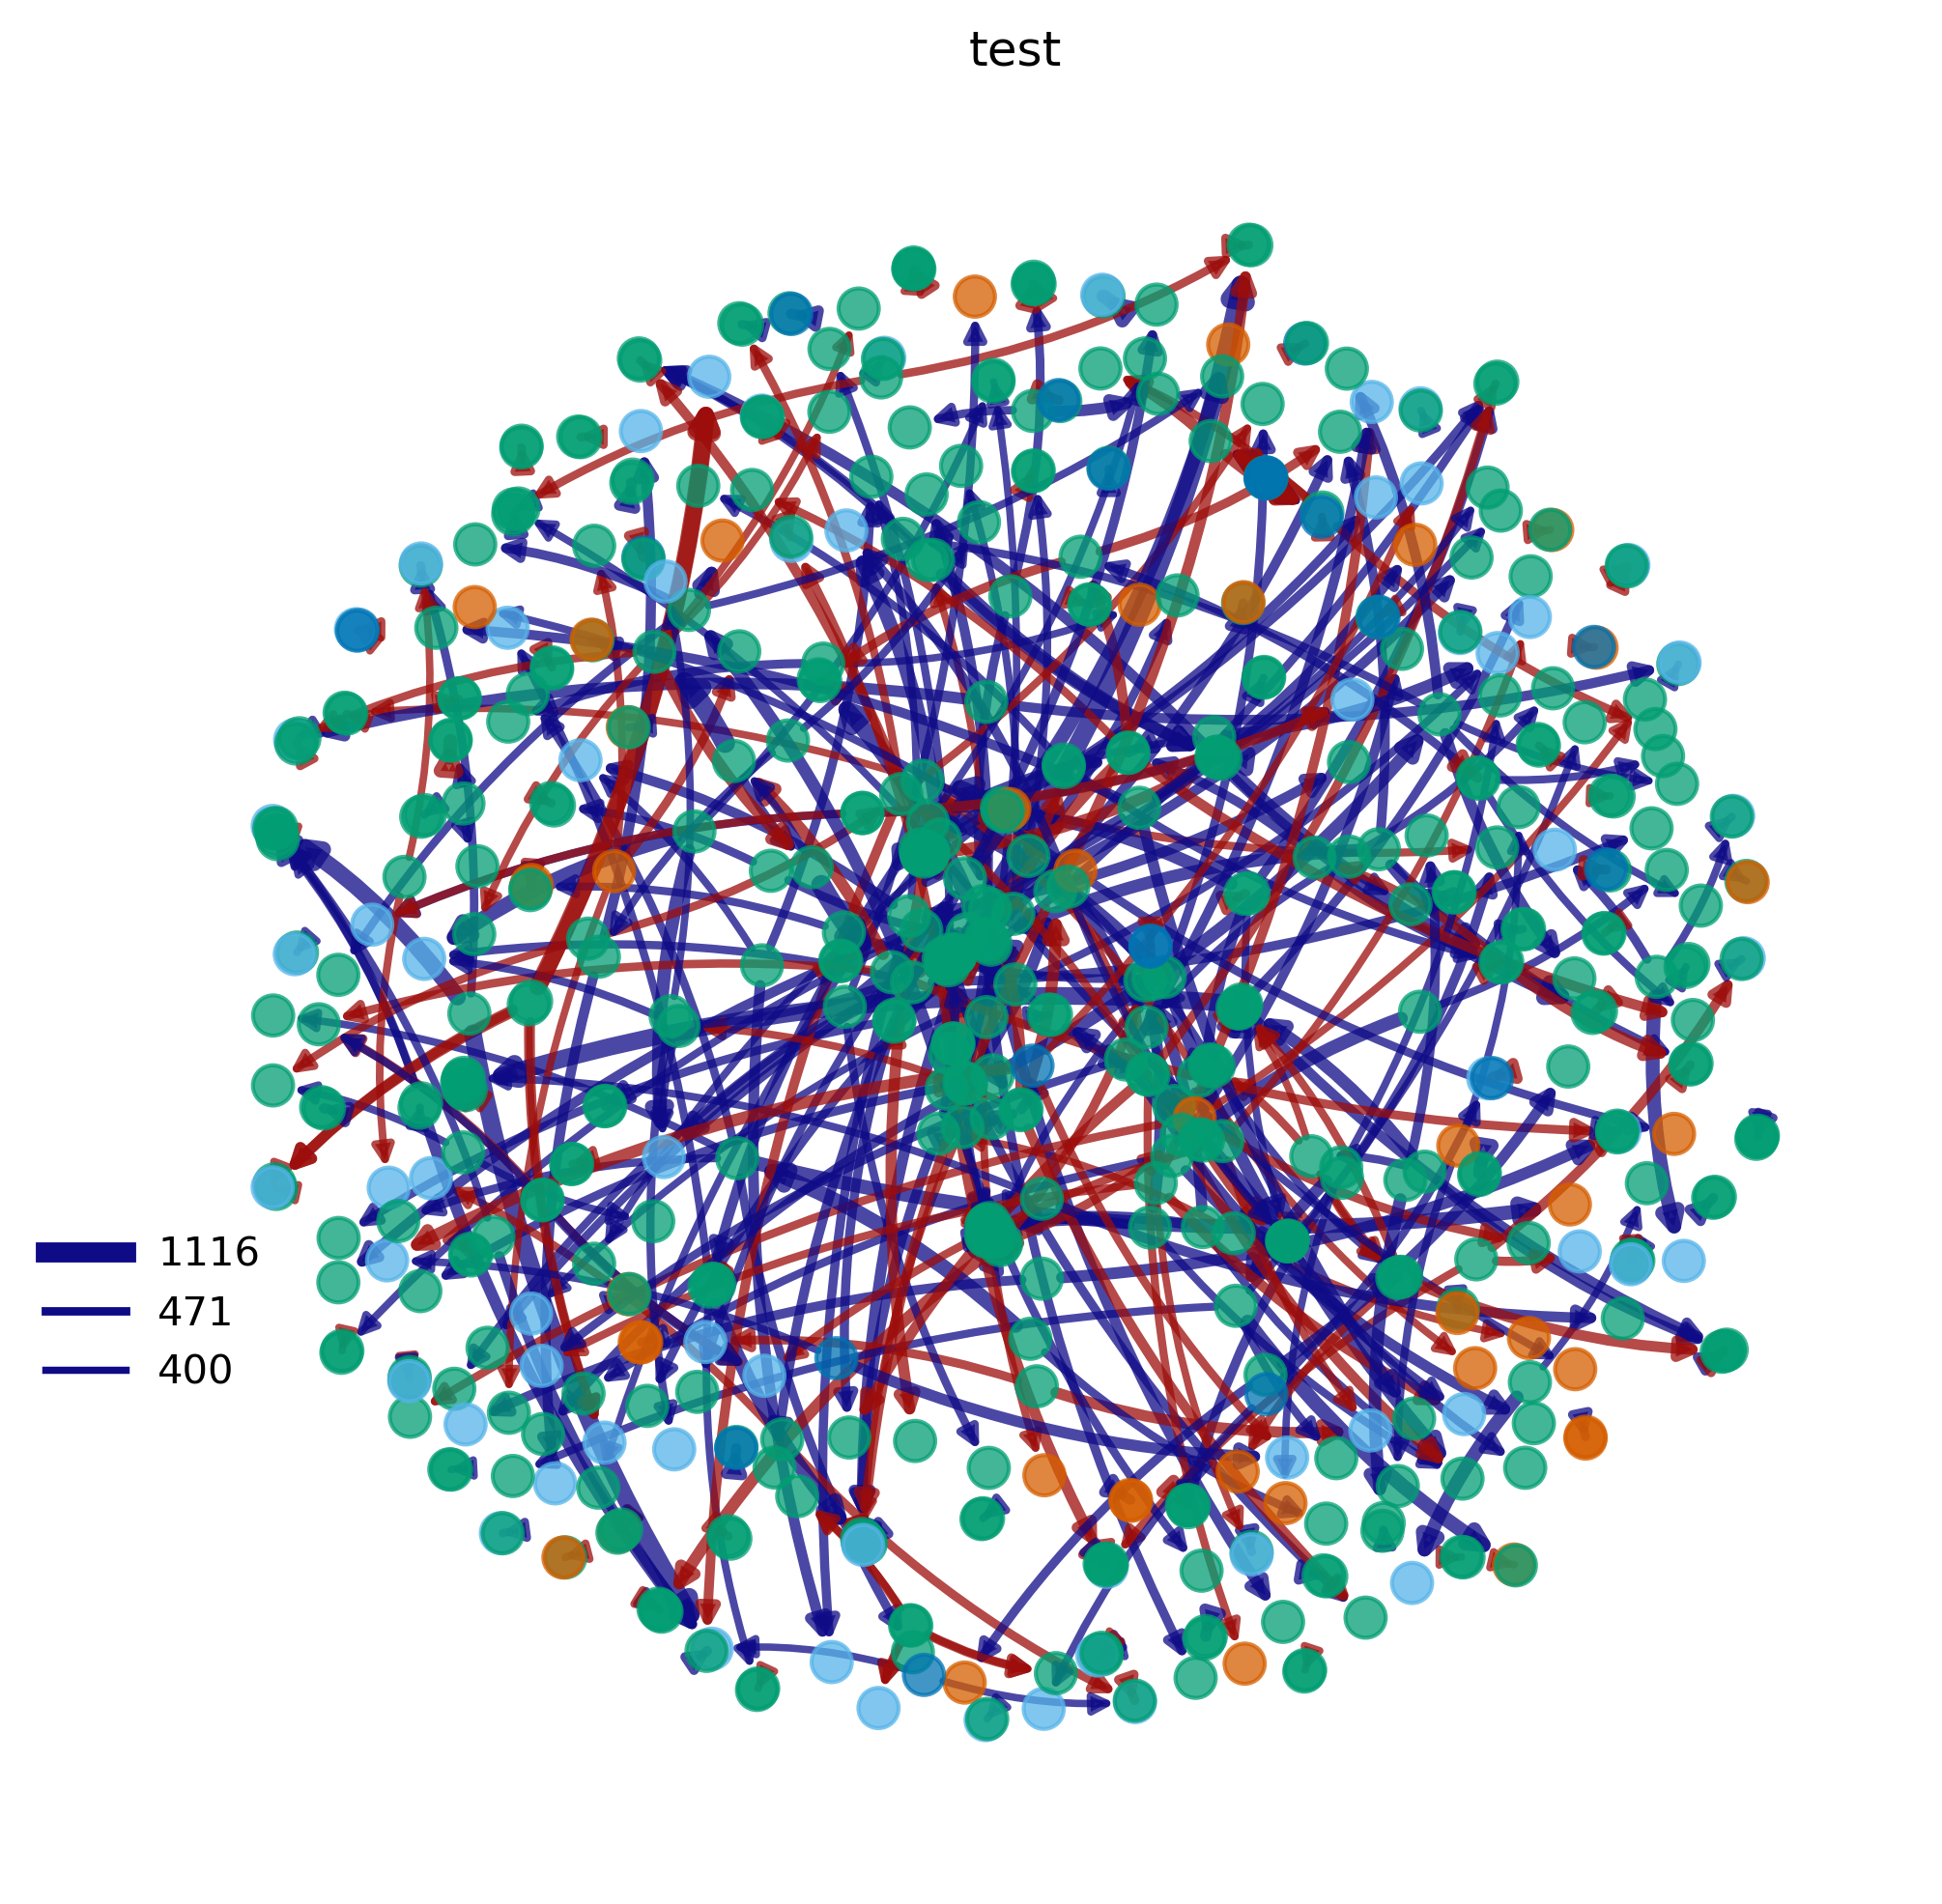

In [7]:
VNC.display_graph(syn_threshold=400)

In [ ]:
mdn_uids = VNC.get_neuron_ids({'type:string': 'MDN'})
mdn_connections = VNC.subgraph(nodes=mdn_uids)
mdn_connections.display_graph(
    label_nodes=True,
    title='MDN-MDN-per-neuropil',
    save = False
    )
plt.show()